# HW1021Q3 CH04Q13(a)(b)(c)(d)

### 13. This question should be answered using the Weekly data set, which is part of the ISLP package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1, 089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

##### (a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?


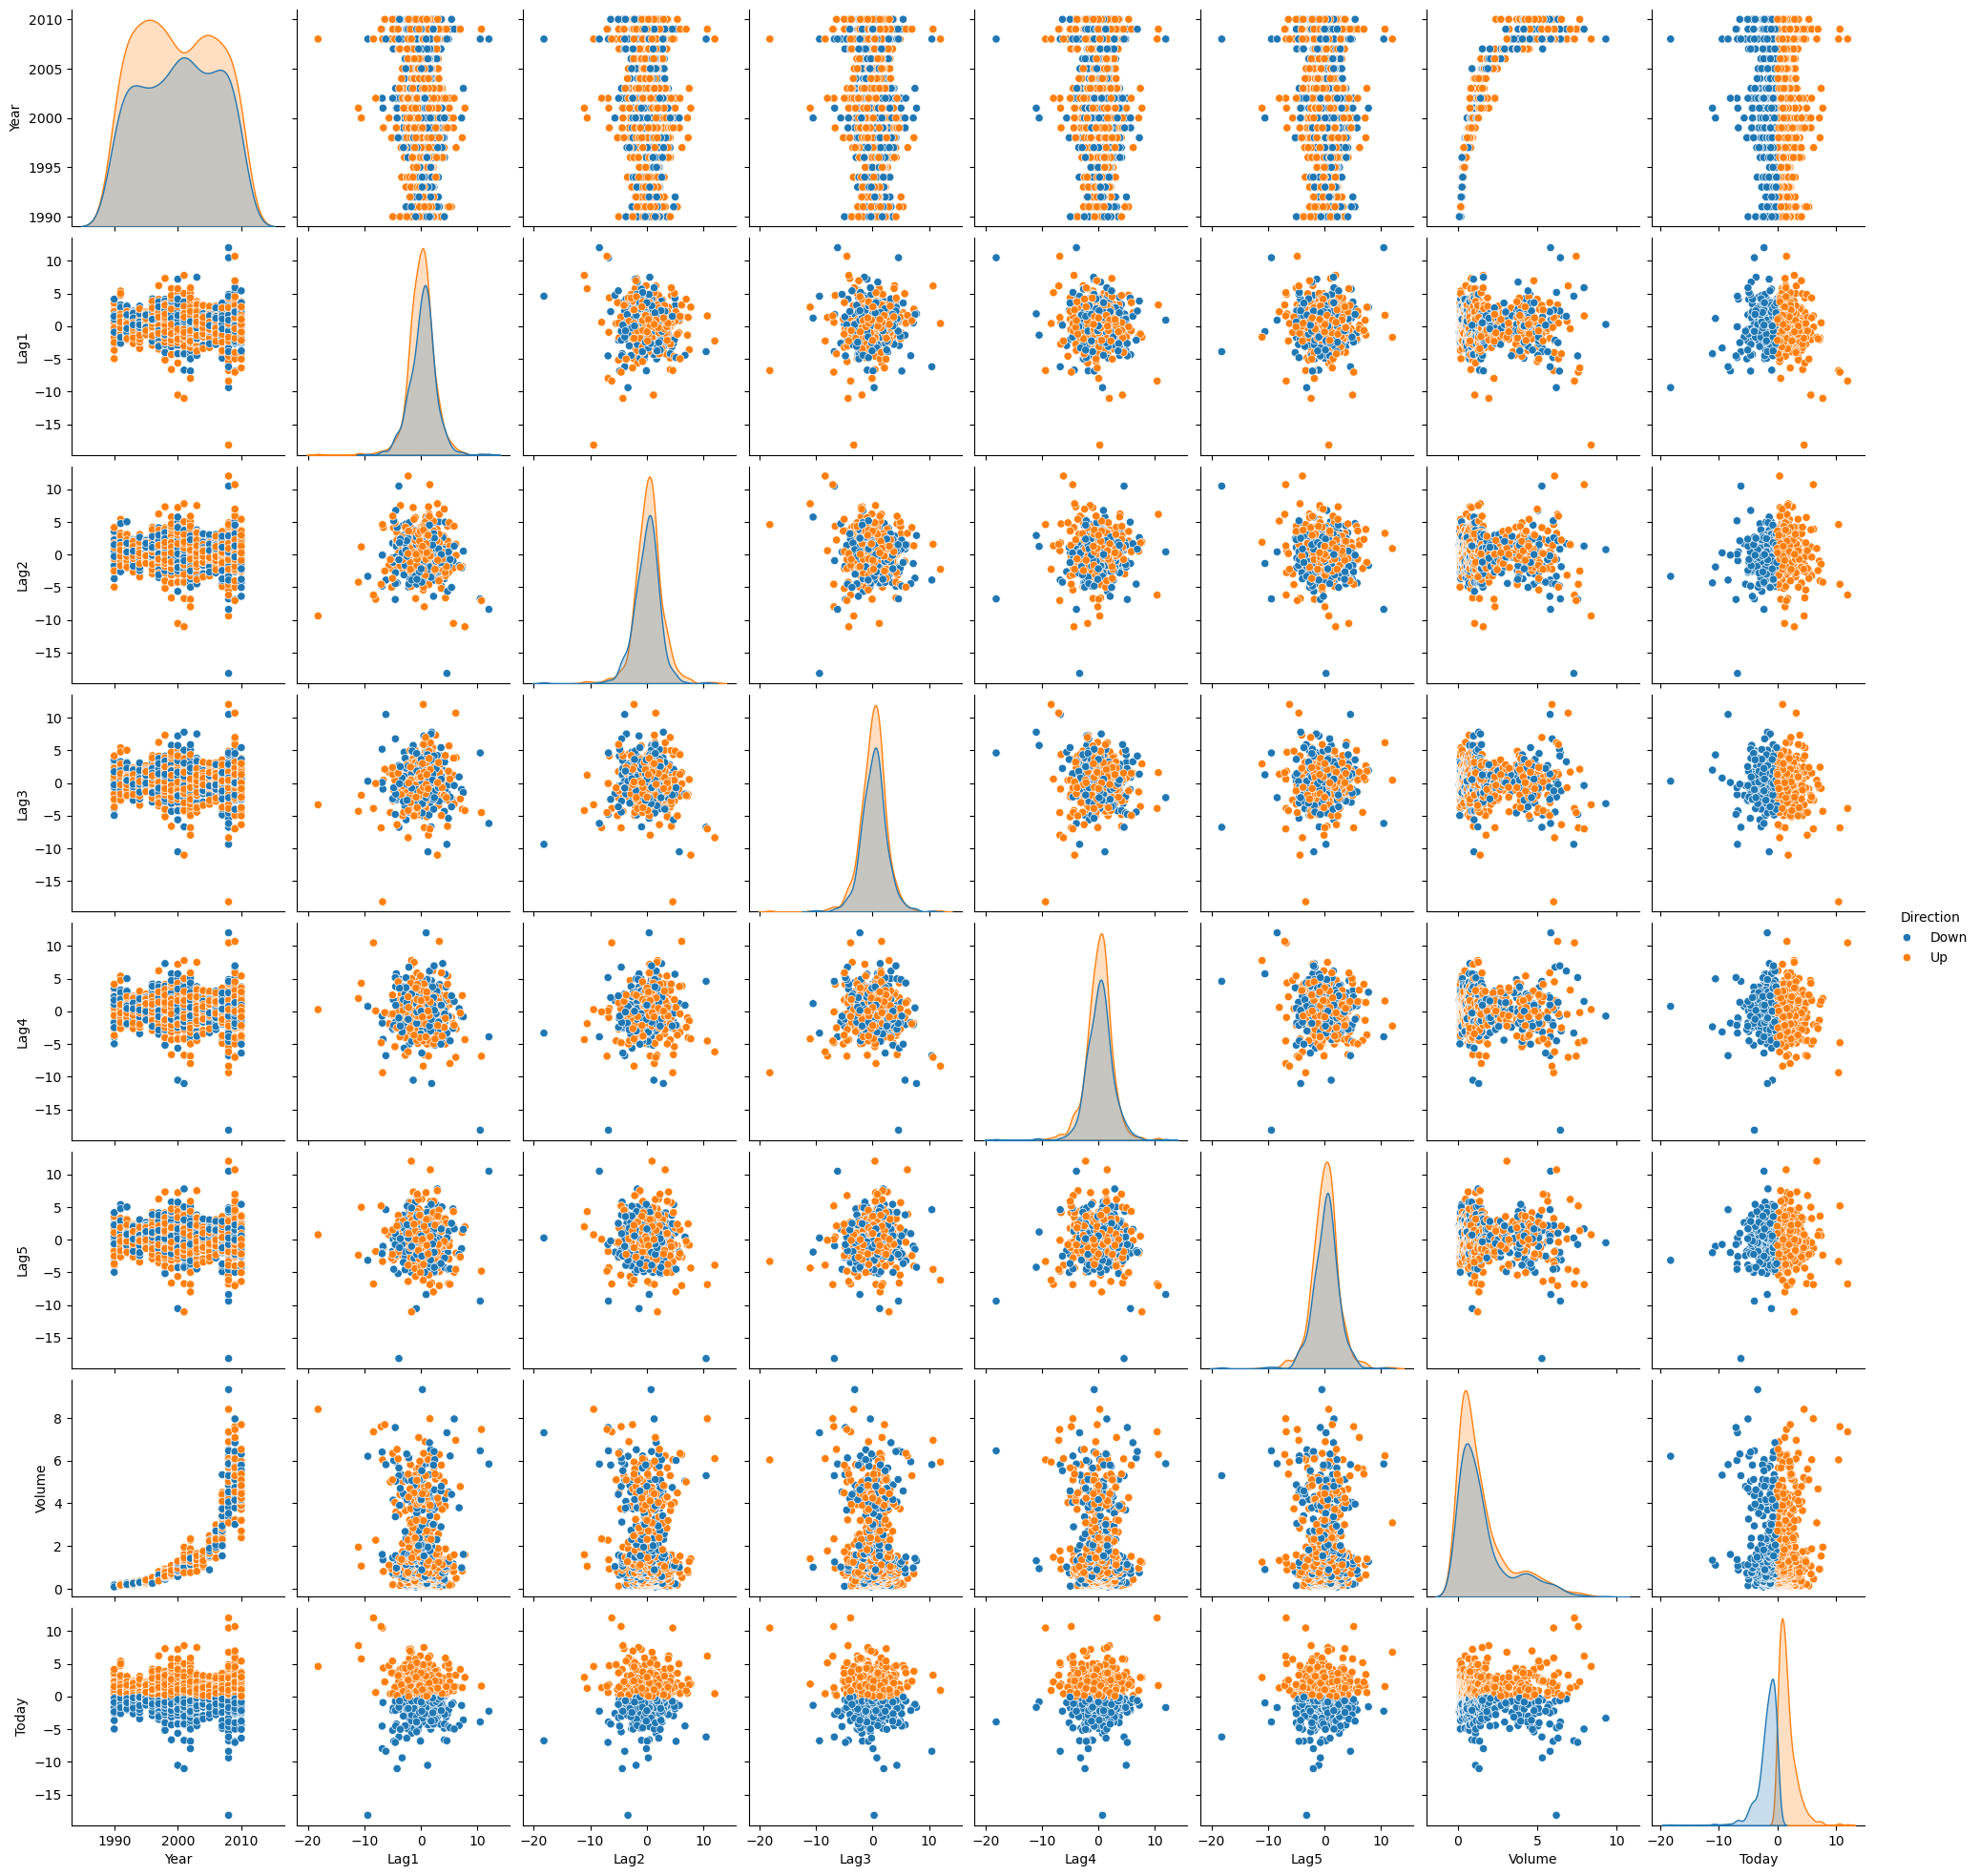

              Year         Lag1         Lag2         Lag3         Lag4  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean   2000.048669     0.150585     0.151079     0.147205     0.145818   
std       6.033182     2.357013     2.357254     2.360502     2.360279   
min    1990.000000   -18.195000   -18.195000   -18.195000   -18.195000   
25%    1995.000000    -1.154000    -1.154000    -1.158000    -1.158000   
50%    2000.000000     0.241000     0.241000     0.241000     0.238000   
75%    2005.000000     1.405000     1.409000     1.409000     1.409000   
max    2010.000000    12.026000    12.026000    12.026000    12.026000   

              Lag5       Volume        Today  
count  1089.000000  1089.000000  1089.000000  
mean      0.139893     1.574618     0.149899  
std       2.361285     1.686636     2.356927  
min     -18.195000     0.087465   -18.195000  
25%      -1.166000     0.332022    -1.154000  
50%       0.234000     1.002680     0.241000  
75% 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ISLP import load_data

weekly_data = load_data('Weekly')

numerical_summary = weekly_data.describe()

sns.pairplot(weekly_data, hue='Direction')
plt.show()

print(numerical_summary)

print("\nAs time progresses, the volume increases.")

##### (b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically signifcant? If so, which ones?

In [2]:
import statsmodels.api as sm

X = weekly_data[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
X = sm.add_constant(X)  
y = weekly_data['Direction'].apply(lambda x: 1 if x == 'Up' else 0)  

logit_model = sm.Logit(y, X).fit()

print(logit_model.summary())

print("\nYes. Lag2 is statistically signifcant.")

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Tue, 22 Oct 2024   Pseudo R-squ.:                0.006580
Time:                        15:03:12   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

##### (c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score

predictions = logit_model.predict(X)

predicted_class = predictions.apply(lambda x: 1 if x > 0.5 else 0)

conf_matrix = confusion_matrix(y, predicted_class)
accuracy = accuracy_score(y, predicted_class)

print("confusion matrix:\n", conf_matrix)
print("Overall Accuracy:", accuracy)

confusion matrix:
 [[ 54 430]
 [ 48 557]]
Overall Accuracy: 0.5610651974288338


True Positives (correctly predicted "Up")  
True Negatives (correctly predicted "Down")  
False Positives (incorrectly predicted "Up" when the actual direction was "Down")  
False Negatives (incorrectly predicted "Down" when the actual direction was "Up")  

##### (d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [4]:
train_data = weekly_data[weekly_data['Year'] <= 2008]
test_data = weekly_data[weekly_data['Year'] >= 2009]

X_train = sm.add_constant(train_data['Lag2'])
y_train = train_data['Direction'].apply(lambda x: 1 if x == 'Up' else 0)
X_test = sm.add_constant(test_data['Lag2'])
y_test = test_data['Direction'].apply(lambda x: 1 if x == 'Up' else 0)

logit_model_train = sm.Logit(y_train, X_train).fit()

test_predictions = logit_model_train.predict(X_test)
test_predicted_class = test_predictions.apply(lambda x: 1 if x > 0.5 else 0)

test_conf_matrix = confusion_matrix(y_test, test_predicted_class)
test_accuracy = accuracy_score(y_test, test_predicted_class)

print("Confusion Matrix:\n", test_conf_matrix)
print("Overall Accuracy:", test_accuracy)

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
Confusion Matrix:
 [[ 9 34]
 [ 5 56]]
Overall Accuracy: 0.625
